<h4>ChatGPT vs Bing Source Overlap</h4>
<p>
This notebook presents a comparative analysis of source overlap between ChatGPT and Bing.
The objective is to quantify the extent to which both systems cite or reference overlapping web sources when responding to the same queries.
</p>

In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df, get_bing_df
from metrics import syntactic_overlap, extrapolated_rbo
from plots import boxplot

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,sources_all,domains_cited,domains_additional,domains_all,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, forbes.com], [tomsguide.com],...","[[reddit.com, tomsguide.com, techrepublic.com,...","[[tomsguide.com, forbes.com, reddit.com, techr...","[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, phonearena.com, wired.com], [...","[[reddit.com, theverge.com, techadvisor.com, w...","[[tomsguide.com, phonearena.com, wired.com, re...","[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,[[https://www.techradar.com/news/best-cameraph...,"[[tomsguide.com, techradar.com], [abdgadgets.c...","[[reddit.com, tomsguide.com, stuff.tv, techadv...","[[tomsguide.com, techradar.com, reddit.com, st...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,[[https://www.androidcentral.com/phones/oneplu...,"[[androidcentral.com, tomsguide.com, phonearen...","[[tomsguide.com, wired.com, co.uk, 9to5google....","[[androidcentral.com, tomsguide.com, phonearen...","[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,[[https://www.pcworld.com/article/436674/best-...,"[[windowscentral.com, rtings.com, pcworld.com,...","[[reddit.com, bestbuy.com, windowscentral.com,...","[[windowscentral.com, rtings.com, pcworld.com,...","[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, wired.com], [tomshardware....","[[reddit.com, tomshardware.com, pcworld.com, y...","[[tomshardware.com, wired.com, reddit.com, pcw...","[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, techradar.com], [tomshardw...","[[reddit.com, tomsguide.com, tomshardware.com,...","[[tomshardware.com, techradar.com, reddit.com,...","[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.ultrabookreview.com/2071-best-

<h4>Dataset: Bing</h4>

In [3]:
bing_df = get_bing_df()
bing_df

,query,product,market_type,query_level,content,url,domain,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[The Best Phones We've Tested for 2025 | PCMag...,"[https://www.pcmag.com/picks/the-best-phones, ...","[pcmag.com, tomsguide.com, techradar.com, zdne...","[[Apple iPhone 17, Samsung Galaxy S25 Ultra, S..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,[Top Smartphones Under $1000 About UsTrendingR...,[https://www.analyticsinsight.net/gadgets/best...,"[analyticsinsight.net, techwiser.com, techspec...","[[Samsung Galaxy S25, iPhone 16 Pro, Google Pi..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,[9 Best Camera Phones Under $1000 for Amazing ...,[https://www.techwisehub.com/blog/best-camera-...,"[techwisehub.com, techwiser.com, amateurphotog...","[[Samsung Galaxy S25, iPhone 16, Google Pixel ..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[Best Phones Under $1000 (August 2025) - TechW...,[https://techwiser.com/best-phones-under-1000-...,"[techwiser.com, pcmag.com, techspecs.info, ana...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Plus..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[The Best Laptops We've Tested (September 2025...,"[https://www.pcmag.com/picks/the-best-laptops,...","[pcmag.com, nytimes.com, tomsguide.com, zdnet....","[[Dell 14 Plus (DB14250), Dell Precision 5690,..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[10 Best Laptops 2025 Under $1500: Complete Gu...,[https://gadgetsandall.com/10-best-laptops-202...,"[gadgetsandall.com, gizmodo.com, dockuniverse....","[[Apple MacBook Air 13″ (M4), ASUS ROG Strix G..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, dockuniverse.com...",[[MSI Titan 18 HX Gaming Laptop (A14VIG-036US)...
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, gizmodo.com, ofz...","[[MSI Titan 18 HX, ASUS Zenbook 14, MSI Titan ..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[The Best Smartwatches We've Tested for 2025 |...,[https://www.pcmag.com/picks/the-best-smartwat...,"[pcmag.com, forbes.com, tomsguide.com, techrad...","[[Apple Watch Series 11, Samsung Galaxy Watch ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[Best budget smartwatches: 6 cheap but good op...,[https://www.wareable.com/smartwatches/best-ch...,"[wareable.com, tomsguide.com, pcmag.com, techr...","[[Amazfit Active 2, Huawei Watch Fit 3, Xiaomi..."


<h4>Cross-System Mean Source Overlap (CSMSO) - Definition & Implementation</h4>
<p>To evaluate how closely ChatGPT’s cited sources align with the web pages retrieved by Bing for the same query, we define the Cross-System Mean Source Overlap (CSMSO). This metric helps us capture, on average, how much overlap exists between ChatGPT’s cited sources and Bing’s organic results across multiple runs.</p>
<ul>
  <li>ChatGPT source lists: $ G_q = [g_{q1}, g_{q2}, g_{q3}] $, where each $ g_{qi} $ is the list of sources cited by ChatGPT in run $ i $ for query $ q $.</li>
  <li>Bing results: $ B_q = [b_{q1}, \ldots, b_{q10}] $, where each $ b_{qi} $ is an individual Bing organic search result i for query $ q $.</li>
</ul>
<p>Formally, the Cross-System Mean Source Overlap for query $ q $ is</p>
<p>
\[
\mathrm{CSMSO}(q) = \frac{1}{|G_q|} \sum_{i=1}^{|G_q|} O_{\text{syntactic}}(g_{qi}, B_q)
\]
</p>
<p>Here, $ O_{\text{syntactic}}(g_{qi}, B_q) $ denotes the syntactic overlap between the ChatGPT source list $ g_{qi} $ and Bing’s aggregated set derived from $ B_q $. Higher $ \mathrm{CSMSO}(q) $ indicates greater alignment in referenced domains across systems for the same query.</p>


In [4]:
def calc_csmso(chatgpt_df, bing_df, overlap_function, chatgpt_sources):
    results = []

    for idx, row in chatgpt_df.iterrows():
        query = row.get("query")
        
        b = bing_df[bing_df["query"] == query]["url"].iloc[0]        
        g_lists = row[chatgpt_sources]
        pairwise_scores = [syntactic_overlap(g, b) for g in g_lists]
        
        results.append({
            "query": query,
            "product": row.get("product"),
            "market_type": row.get("market_type"),
            "query_level": row.get("query_level"),
            "csmso_mean": float(np.mean(pairwise_scores)),
            "csmso_std": float(np.std(pairwise_scores, ddof = 0)) if len(pairwise_scores) > 1 else 0.0,
        })
    
    return pd.DataFrame(results)

<h4>Mean Internal Source Overlap - Analysis (ChatGPT: Cited Sources in Response)</h4>

In [5]:
csmso_df_cs = calc_csmso(chatgpt_df, bing_df, overlap_function = syntactic_overlap, chatgpt_sources = "sources_cited")
csmso_df_cs

,query,product,market_type,query_level,csmso_mean,csmso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.722222,0.207870
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.333333,0.471405
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.000000,0.000000
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.577778,0.125708
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.000000,0.000000
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.000000,0.000000
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.550000,0.147196
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.000000,0.000000


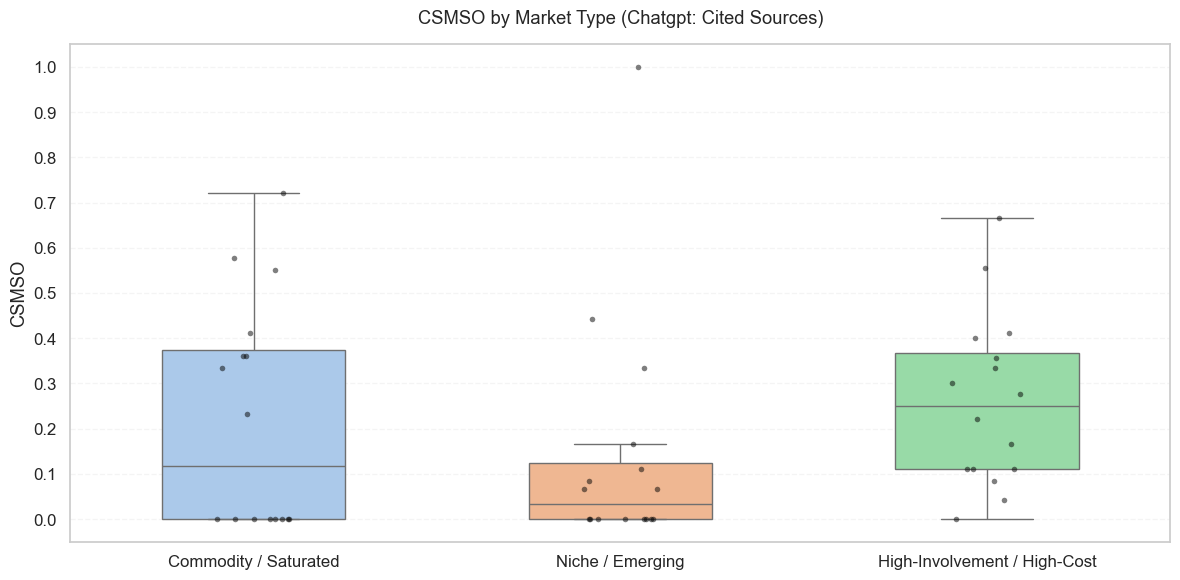

In [6]:
csmso_cs_cs = csmso_df_cs[csmso_df_cs["market_type"] == "Commodity / Saturated"]
csmso_ne_cs = csmso_df_cs[csmso_df_cs["market_type"] == "Niche / Emerging"]
csmso_hh_cs = csmso_df_cs[csmso_df_cs["market_type"] == "High-Involvement / High-Cost"]

plot_df_cs = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_cs_cs["csmso_mean"],
        csmso_ne_cs["csmso_mean"],
        csmso_hh_cs["csmso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csmso_cs_cs)
        + ["Niche / Emerging"] * len(csmso_ne_cs)
        + ["High-Involvement / High-Cost"] * len(csmso_hh_cs)
    )
})

boxplot(
    df = plot_df_cs,
    x_col = "Market Type",
    y_col = "CSMSO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "CSMSO by Market Type (Chatgpt: Cited Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

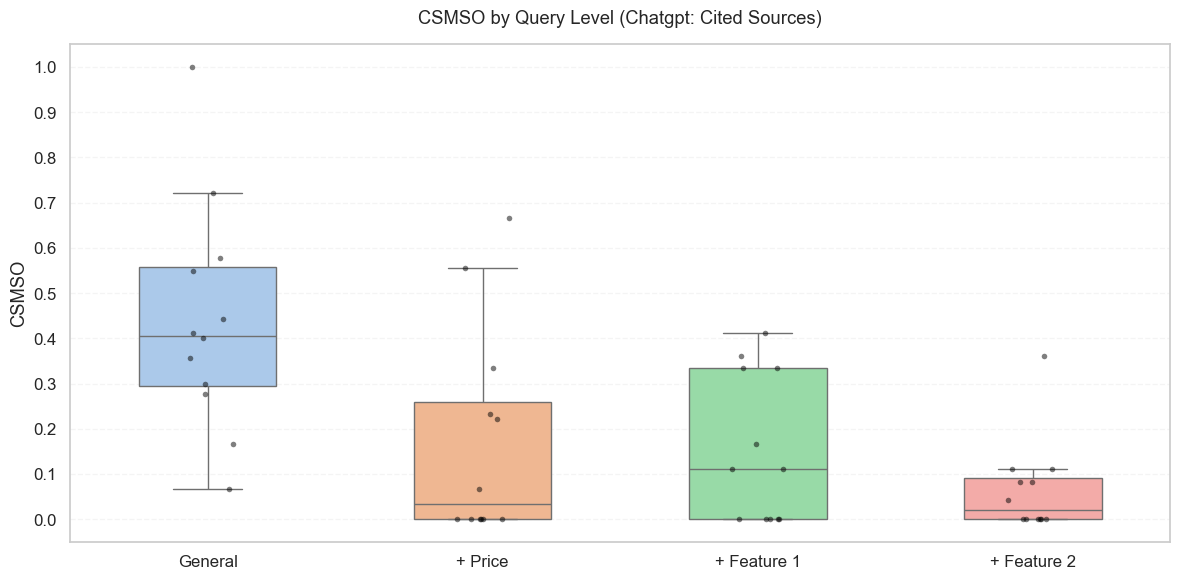

In [7]:
csmso_g_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General"]
csmso_gp_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General & Price"]
csmso_gpf_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General & Price & Feature"]
csmso_gpff_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General & Price & Feature & Feature"]

plot_df_cs = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_g_cs["csmso_mean"],
        csmso_gp_cs["csmso_mean"],
        csmso_gpf_cs["csmso_mean"],
        csmso_gpff_cs["csmso_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["General"] * len(csmso_g_cs)
        + ["+ Price"] * len(csmso_gp_cs)
        + ["+ Feature 1"] * len(csmso_gpf_cs)
        + ["+ Feature 2"] * len(csmso_gpff_cs)
    )
})

boxplot(
    df = plot_df_cs,
    x_col = "Query Level",
    y_col = "CSMSO",
    order = ["General", "+ Price", "+ Feature 1", "+ Feature 2"],
    title = "CSMSO by Query Level (Chatgpt: Cited Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

<h4>CSMSO by Query Level (ChatGPT: Cited Sources)</h4> 

<p>This plot shows that overlap between ChatGPT’s cited sources and Bing’s top results declines as query complexity increases from general (G) to fully constrained (G + P + F + F). General queries share more sources, while feature-rich or constraint-heavy ones yield less alignment.</p> 

<ul> 
    <li>General queries (G) align more because both systems draw from broad, authoritative pages matching common intent and entity-level authority
    </li> 
    <li>Adding product and feature constraints narrows Bing’s candidate set, but ChatGPT may generalize across similar items, reducing overlap.</li> 
    <li>At the most specific level, ChatGPT’s generation favors synthesis across non-ranked or long-form sources rather than direct URL matches.</li> 
    <li>This pattern reflects how LLM retrieval synthesis diverges from rank-based retrieval when handling fine-grained, multi-constraint intent.</li>
</ul> 

<p>In summary, ChatGPT’s overlap with Bing weakens as queries become more specific, reflecting a shift from retrieval alignment to generative synthesis.</p>

<br/>

<h4>Mean Internal Source Overlap - Analysis (ChatGPT: All Sources in Response)</h4>

In [8]:
csmso_df_as = calc_csmso(chatgpt_df, bing_df, overlap_function = syntactic_overlap, chatgpt_sources = "sources_all")
csmso_df_as

,query,product,market_type,query_level,csmso_mean,csmso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.300000,0.000000e+00
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.100000,1.387779e-17
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.185185,1.047566e-01
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.125000,0.000000e+00
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.233333,4.714045e-02
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.066667,4.714045e-02
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.000000,0.000000e+00
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.037037,5.237828e-02
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.333333,0.000000e+00
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.037037,5.237828e-02


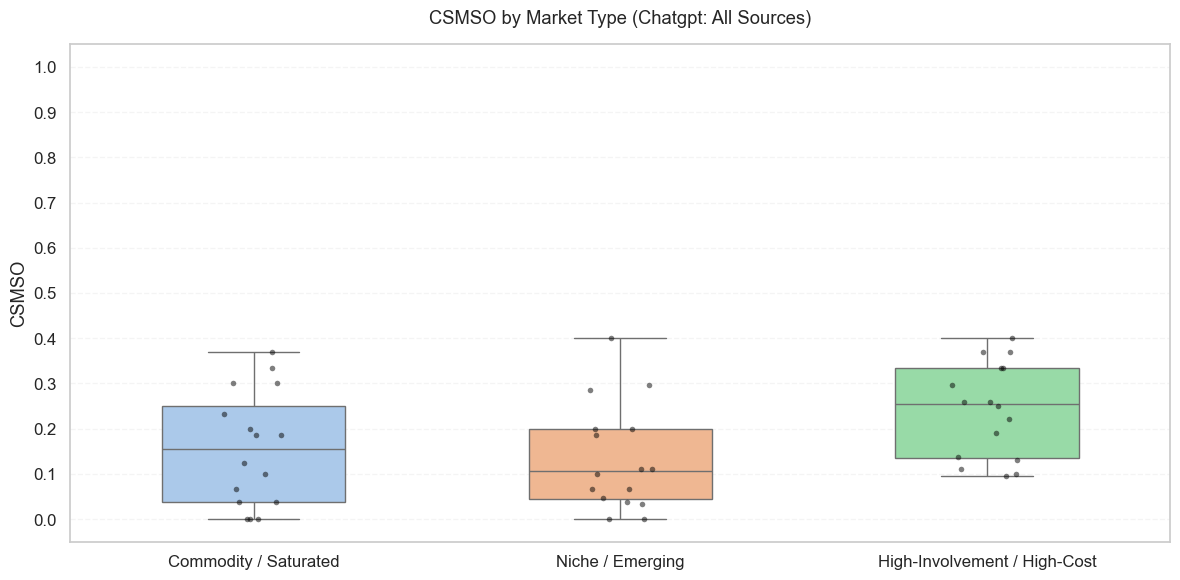

In [9]:
csmso_cs_as = csmso_df_as[csmso_df_as["market_type"] == "Commodity / Saturated"]
csmso_ne_as = csmso_df_as[csmso_df_as["market_type"] == "Niche / Emerging"]
csmso_hh_as = csmso_df_as[csmso_df_as["market_type"] == "High-Involvement / High-Cost"]

plot_df_as = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_cs_as["csmso_mean"],
        csmso_ne_as["csmso_mean"],
        csmso_hh_as["csmso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csmso_cs_as)
        + ["Niche / Emerging"] * len(csmso_ne_as)
        + ["High-Involvement / High-Cost"] * len(csmso_hh_as)
    )
})

boxplot(
    df = plot_df_as,
    x_col = "Market Type",
    y_col = "CSMSO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "CSMSO by Market Type (Chatgpt: All Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

<br/>

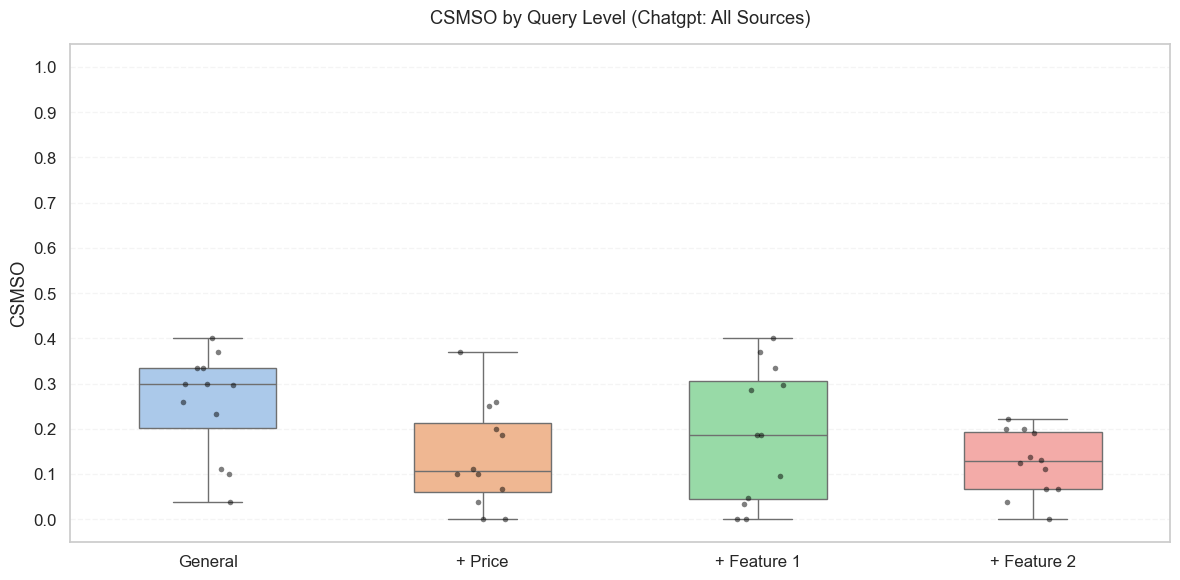

In [10]:
csmso_g_as = csmso_df_as[csmso_df_as["query_level"] == "General"]
csmso_gp_as = csmso_df_as[csmso_df_as["query_level"] == "General & Price"]
csmso_gpf_as = csmso_df_as[csmso_df_as["query_level"] == "General & Price & Feature"]
csmso_gpff_as = csmso_df_as[csmso_df_as["query_level"] == "General & Price & Feature & Feature"]

plot_df_as = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_g_as["csmso_mean"],
        csmso_gp_as["csmso_mean"],
        csmso_gpf_as["csmso_mean"],
        csmso_gpff_as["csmso_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["General"] * len(csmso_g_as)
        + ["+ Price"] * len(csmso_gp_as)
        + ["+ Feature 1"] * len(csmso_gpf_as)
        + ["+ Feature 2"] * len(csmso_gpff_as)
    )
})

boxplot(
    df = plot_df_as,
    x_col = "Query Level",
    y_col = "CSMSO",
    order = ["General", "+ Price", "+ Feature 1", "+ Feature 2"],
    title = "CSMSO by Query Level (Chatgpt: All Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)